LeNet -5 Model
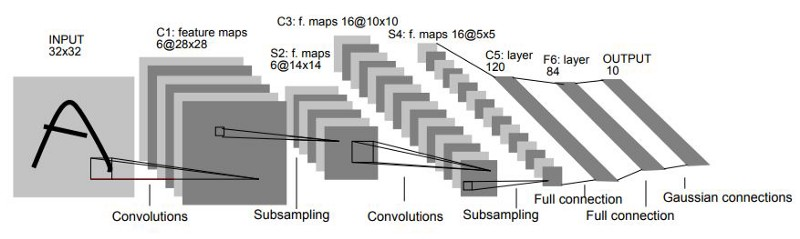

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.datasets import mnist
from keras.utils import np_utils


In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

In [ ]:
# Normalize the value to 0 & 1

x_train = x_train/255.0
x_test = x_test/255.0



In [ ]:
x_train = x_train.reshape(x_train.shape[0], 28,28,1)
x_test = x_test.reshape(x_test.shape[0], 28,28,1)
print(x_train.shape, x_test.shape)


In [ ]:
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)
print(y_train.shape, y_test.shape)

In [ ]:
plt.figure(figsize=(5,5))

for i in range(24):
  plt.subplot(6,4,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(x_train[i])

plt.show()

In [ ]:
# Building the LeNet-5 Model

In [ ]:
from keras import Sequential
from keras.layers import Dense, Conv2D, Flatten, AveragePooling2D

In [ ]:
# Architecture
model = Sequential()

# C1 - convolution layer
model.add(Conv2D(6, kernel_size=(5,5), strides=(1,1), padding='valid', activation='tanh', input_shape=(28,28,1)))
# Pooling layer 1
model.add(AveragePooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))

# C2 - convolution layer
model.add(Conv2D(16, kernel_size=(5,5), strides=(1,1), padding='valid', activation='tanh'))
# Pooling layer 2
model.add(AveragePooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))

# Flatten
model.add(Flatten())

# Hidden layer 1
model.add(Dense(120, activation='tanh'))
# Hidden layer 2
model.add(Dense(84, activation='tanh'))
# Hidden layer 3
model.add(Dense(10, activation='softmax'))

model.summary()


In [ ]:
# Compile the Model
model.compile(loss= keras.losses.categorical_crossentropy, optimizer='adam', metrics = ['accuracy'])

In [ ]:
# Check train and test result
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size = 128, epochs=21, verbose=1)

In [ ]:
# Visualize the output

f,ax = plt.subplots()
ax.plot([None]+ history.history['accuracy'], 'o-')
ax.plot([None]+ history.history['val_accuracy'], 'x-')

ax.legend(['Training Accuracy', 'Validation Accuracy'], loc=0)
ax.set_title('Comparision of Train & Test result')

ax.set_xlabel('Epochs')
ax.set_ylabel('Accuracy')

In [ ]:
f,ax = plt.subplots()
ax.plot([None]+ history.history['loss'], 'o-')
ax.plot([None]+ history.history['val_loss'], 'x-')

ax.legend(['Training loss', 'Validation loss'], loc=0)
ax.set_title('Comparision of Train & Test loss result')

ax.set_xlabel('Epochs')
ax.set_ylabel('Loss')